In [1]:
import numpy as np, matplotlib.pyplot as plt
plt.xkcd();

In [2]:
def f(x): return x**2-2

In [3]:
def secant(f, x0, x1, steps, verbatim=True):
    outputx = [x0,x1]
    outputy = [f(a) for a in outputx]
    output  = "\\begin{tabular}{|r|r|r|} \\hline\n"
    output += "$n$ & $x_n$ & $f(x_n)$ \\\\ \\hline \\hline\n"
    output += "$0$ & $%1.15f$ & $%1.4E$ \\\\ \\hline\n" % (x0, f(x0))
    output += "$1$ & $%1.15f$ & $%1.4E$ \\\\ \\hline\n" % (x1, f(x1))
    for step in range(steps):
        xn = x0 - f(x0)*(x1-x0)/(f(x1)-f(x0))
        output += "$%0d$ & $%1.15f$ & $%1.4E$ \\\\ \\hline\n" % (step+2, xn, f(xn))
        outputx.append(xn)
        outputy.append(f(xn))
        x0 = x1
        x1 = xn
    output += "\\end{tabular}"
    if verbatim: print(output)
    return outputx, outputy, output
        

In [4]:
outputx,outputy, output = secant(f,3.,2.8,7)

\begin{tabular}{|r|r|r|} \hline
$n$ & $x_n$ & $f(x_n)$ \\ \hline \hline
$0$ & $3.000000000000000$ & $7.0000E+00$ \\ \hline
$1$ & $2.800000000000000$ & $5.8400E+00$ \\ \hline
$2$ & $1.793103448275862$ & $1.2152E+00$ \\ \hline
$3$ & $1.528528528528528$ & $3.3640E-01$ \\ \hline
$4$ & $1.427253172054743$ & $3.7052E-02$ \\ \hline
$5$ & $1.414717869757887$ & $1.4267E-03$ \\ \hline
$6$ & $1.414215876250105$ & $6.5446E-06$ \\ \hline
$7$ & $1.414213562785585$ & $1.1667E-09$ \\ \hline
$8$ & $1.414213562373095$ & $8.8818E-16$ \\ \hline
\end{tabular}


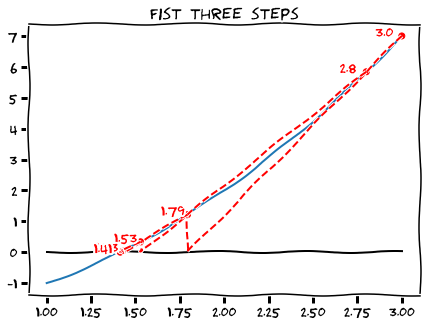

In [5]:
x = np.linspace(1,3)

plt.figure(figsize=(7,5))
plt.plot(x,x**2-2)
plt.plot(x,np.zeros_like(x), 'k')
plt.plot(outputx,outputy,'ro')
for step in range(len(outputx)-2):
    ox = [outputx[step],outputx[step+1],outputx[step+2],outputx[step+2]]
    oy = [outputy[step],outputy[step+1],0,outputy[step+2]]
    plt.plot(ox,oy,'r--')
    plt.text(outputx[step]-0.15, outputy[step],np.round(outputx[step],2),color='r')
plt.title("Fist three steps")
plt.show()

In [54]:
def g(x,y): return np.array([x**3-y, y**3-x]).astype(float)

In [189]:
def broyden(f, x0,y0, A0, steps):
    # First step
    output  = "\\begin{tabular}{|r|r|r|l,r|} \\hline \n"
    output += "$n$ & $x_n$ & $y_n$ & $f(x_n$ & &y_n)$ \\hline \\hline \\\\ \n"
    output += "$1$ & $%1.6f$ & $%1.6f$ & $\\big( %1.6f$ & $%1.6f \\big)$ \\hline \\\\ \n" % (x0, y0, f(x0,y0)[0], f(x0,y0)[1])
    L0 = np.matrix([x0,y0]).T - A0.I * np.matrix(g(x0,y0)).T
    x1 = L0[0,0]
    y1 = L0[1,0]
    output += "$2$ & $%1.6f$ & $%1.6f$ & $\\big( %1.6f$ & $%1.6f \\big)$ \\hline \\\\ \n" % (x1, y1, f(x1,y1)[0], f(x1,y1)[1])
    outputx = [x0,x1]
    outputy = [y0,y1]
    # Next steps
    for step in range(steps):
#         print(step)
        d = np.matrix([x1-x0, y1-y0])
        y = np.matrix(g(x1,y1) - g(x0,y0))
        L0 = y.T-A0*d.T
#         print(L0)
#         print(np.matrix(np.tensordot(L0, d, axes=0)))
        A1 = A0 + np.matrix(np.tensordot(L0, d, axes=0))/np.linalg.norm(d)**2
        L1 = np.matrix([x1,y1]).T - A1.I * np.matrix(g(x1,y1)).T
        xn = L1[0,0]
        yn = L1[1,0]
        outputx.append(xn)
        outputy.append(yn)
        output += "$%d$ & $%1.6f$ & $%1.6f$ & $\\big( %1.6f$ & $%1.6f \\big)$ \\hline \\\\ \n" %(step+2, xn, yn, f(xn,yn)[0], f(xn,yn)[1])
        x0 = x1
        y0 = y1
        x1 = xn
        y1 = yn
    output += "\\end{tabular}"
    print(output)
    return outputx,outputy

In [194]:
ox1,oy1 = broyden(g,-1.,1.,A0,5)

\begin{tabular}{|r|r|r|l,r|} \hline 
$n$ & $x_n$ & $y_n$ & $f(x_n$ & &y_n)$ \hline \hline \\ 
$1$ & $-1.000000$ & $1.000000$ & $\big( -2.000000$ & $2.000000 \big)$ \hline \\ 
$2$ & $-0.500000$ & $0.500000$ & $\big( -0.625000$ & $0.625000 \big)$ \hline \\ 
$2$ & $-0.272727$ & $0.272727$ & $\big( -0.293013$ & $0.293013 \big)$ \hline \\ 
$3$ & $-0.072136$ & $0.072136$ & $\big( -0.072511$ & $0.072511 \big)$ \hline \\ 
$4$ & $-0.006172$ & $0.006172$ & $\big( -0.006172$ & $0.006172 \big)$ \hline \\ 
$5$ & $-0.000035$ & $0.000035$ & $\big( -0.000035$ & $0.000035 \big)$ \hline \\ 
$6$ & $-0.000000$ & $0.000000$ & $\big( -0.000000$ & $0.000000 \big)$ \hline \\ 
\end{tabular}


In [208]:
ox2,oy2 = broyden(g,3.5,2.1,np.matrix("36.75,-1;-1,13.23"),25)

\begin{tabular}{|r|r|r|l,r|} \hline 
$n$ & $x_n$ & $y_n$ & $f(x_n$ & &y_n)$ \hline \hline \\ 
$1$ & $3.500000$ & $2.100000$ & $\big( 40.775000$ & $5.761000 \big)$ \hline \\ 
$2$ & $2.376316$ & $1.579616$ & $\big( 11.839151$ & $1.565119 \big)$ \hline \\ 
$2$ & $1.918759$ & $1.379012$ & $\big( 5.685165$ & $0.703674 \big)$ \hline \\ 
$3$ & $1.500844$ & $1.202627$ & $\big( 2.178070$ & $0.238530 \big)$ \hline \\ 
$4$ & $1.246210$ & $1.098901$ & $\big( 0.836510$ & $0.080804 \big)$ \hline \\ 
$5$ & $1.090403$ & $1.036751$ & $\big( 0.259716$ & $0.023950 \big)$ \hline \\ 
$6$ & $1.020664$ & $1.009058$ & $\big( 0.054224$ & $0.006757 \big)$ \hline \\ 
$7$ & $1.001534$ & $1.001290$ & $\big( 0.003319$ & $0.002340 \big)$ \hline \\ 
$8$ & $0.999524$ & $1.000314$ & $\big( -0.001741$ & $0.001419 \big)$ \hline \\ 
$9$ & $0.999507$ & $1.000181$ & $\big( -0.001658$ & $0.001036 \big)$ \hline \\ 
$10$ & $0.999506$ & $0.999853$ & $\big( -0.001335$ & $0.000052 \big)$ \hline \\ 
$11$ & $0.999542$ & $0.999848$ 

In [209]:
ox3,oy3 = broyden(g,-13.5,-7.3,np.matrix("546.75,-1;-1,159.87"),30)

\begin{tabular}{|r|r|r|l,r|} \hline 
$n$ & $x_n$ & $y_n$ & $f(x_n$ & &y_n)$ \hline \hline \\ 
$1$ & $-13.500000$ & $-7.300000$ & $\big( -2453.075000$ & $-375.517000 \big)$ \hline \\ 
$2$ & $-9.009004$ & $-4.923019$ & $\big( -726.267179$ & $-110.305836 \big)$ \hline \\ 
$2$ & $-7.121529$ & $-3.931750$ & $\big( -357.244912$ & $-53.658043 \big)$ \hline \\ 
$3$ & $-5.299771$ & $-2.982363$ & $\big( -145.875320$ & $-21.226830 \big)$ \hline \\ 
$4$ & $-4.053488$ & $-2.340071$ & $\big( -64.261847$ & $-8.760579 \big)$ \hline \\ 
$5$ & $-3.091886$ & $-1.851054$ & $\big( -27.706640$ & $-3.250563 \big)$ \hline \\ 
$6$ & $-2.394290$ & $-1.502050$ & $\big( -12.223523$ & $-0.994569 \big)$ \hline \\ 
$7$ & $-1.890143$ & $-1.254736$ & $\big( -5.498070$ & $-0.085267 \big)$ \hline \\ 
$8$ & $-1.543858$ & $-1.089012$ & $\big( -2.590772$ & $0.252347 \big)$ \hline \\ 
$9$ & $-1.324572$ & $-0.987629$ & $\big( -1.336319$ & $0.361227 \big)$ \hline \\ 
$10$ & $-1.205856$ & $-0.935919$ & $\big( -0.817500$ & $0.3

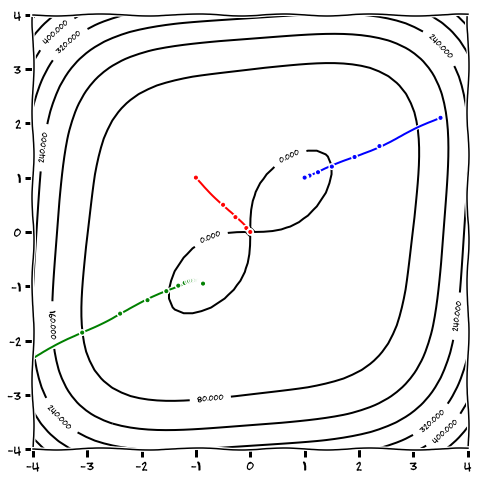

In [211]:
x = np.linspace(-4,4)
y = np.linspace(-4,4)
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(8,8))
plt.axes(aspect='equal')
CS = plt.contour(X,Y,X**4-4*X*Y+Y**4,colors='k')
plt.clabel(CS, fontsize=9)
plt.plot(ox1,oy1,'r-')
plt.plot(ox1,oy1,'r.')
plt.plot(ox2,oy2,'b-')
plt.plot(ox2,oy2,'b.')
plt.plot(ox3,oy3,'g-')
plt.plot(ox3,oy3,'g.')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()